<a href="https://colab.research.google.com/github/vishakha1221/DAV/blob/main/Practocal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()

# Features and target
X = wine.data
y = wine.target

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print sizes
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (142, 13)
Testing size: (36, 13)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (K=3):", accuracy)

Accuracy (K=3): 0.9444444444444444


K = 1 Accuracy = 0.9444444444444444
K = 3 Accuracy = 0.9444444444444444
K = 5 Accuracy = 0.9444444444444444
K = 7 Accuracy = 0.9444444444444444


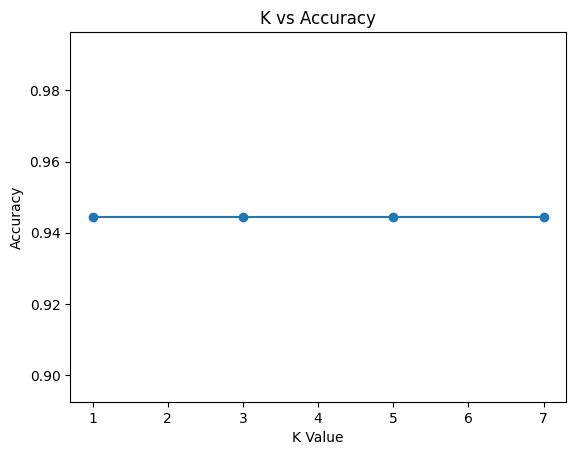

In [15]:
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("K =", k, "Accuracy =", acc)

# Plot K vs Accuracy
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [18]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.63888889 0.69444444 0.66666667 0.65714286 0.85714286]
Average Accuracy: 0.7028571428571428
